In [1]:
import pandas as pd
import numpy as np

In [2]:
#Model #2: Decision tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [3]:
bikeShare = pd.read_csv('bikeshare2020model.csv')

In [4]:
regressor = DecisionTreeRegressor(random_state = 0)

In [5]:
#splitting out dataset by start station names to create models for each start station
dtdf1 = bikeShare.loc[bikeShare['Start Station Name'] == 'Queens Quay E / Lower Sherbourne St']
dtdf2 = bikeShare.loc[bikeShare['Start Station Name'] == 'Lake Shore Blvd W / Ontario Dr']
dtdf3 = bikeShare.loc[bikeShare['Start Station Name'] == 'Marilyn Bell Park Tennis Court']
dtdf4 = bikeShare.loc[bikeShare['Start Station Name'] == 'HTO Park (Queens Quay W)']
dtdf5 = bikeShare.loc[bikeShare['Start Station Name'] == 'York St / Queens Quay W']

In [6]:
#set X and Y
dtX1 = dtdf1[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
dtX2 = dtdf2[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
dtX3 = dtdf3[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
dtX4 = dtdf4[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
dtX5 = dtdf5[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]

In [7]:
dty1 = dtdf1['Ride Count']
dty2 = dtdf2['Ride Count']
dty3 = dtdf3['Ride Count']
dty4 = dtdf4['Ride Count']
dty5 = dtdf5['Ride Count']

In [8]:
#split into training and testing
from sklearn.model_selection import train_test_split

In [9]:
training_features1, testing_features1, training_labels1, testing_labels1 = train_test_split(dtX1, dty1, test_size = 0.25, random_state = 42)
training_features2, testing_features2, training_labels2, testing_labels2 = train_test_split(dtX2, dty2, test_size = 0.25, random_state = 42)
training_features3, testing_features3, training_labels3, testing_labels3 = train_test_split(dtX3, dty3, test_size = 0.25, random_state = 42)
training_features4, testing_features4, training_labels4, testing_labels4 = train_test_split(dtX4, dty4, test_size = 0.25, random_state = 42)
training_features5, testing_features5, training_labels5, testing_labels5 = train_test_split(dtX5, dty5, test_size = 0.25, random_state = 42)

In [10]:
#train models
dtreg1 = regressor.fit(training_features1, training_labels1)
dtreg2 = regressor.fit(training_features2, training_labels2)
dtreg3 = regressor.fit(training_features3, training_labels3)
dtreg4 = regressor.fit(training_features4, training_labels4)
dtreg5 = regressor.fit(training_features5, training_labels5)

In [11]:
from sklearn.tree import export_graphviz

In [12]:
export_graphviz(regressor, out_file ='tree1.dot',
               feature_names =['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']) 

In [13]:
#use the models to make predictions
y_pred1 = dtreg1.predict(testing_features1)
y_pred2 = dtreg2.predict(testing_features2)
y_pred3 = dtreg3.predict(testing_features3)
y_pred4 = dtreg4.predict(testing_features4)
y_pred5 = dtreg5.predict(testing_features5)

In [14]:
#evaluate the models
from sklearn import metrics

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels1, y_pred1)))
print('r2: ', round(metrics.r2_score(testing_labels1, y_pred1),4))

Mean Absolute Error: 22.661242025777895
Mean Squared Error: 1167.3213123291239
Root Mean Squared Error: 34.166084240502656
r2:  0.6459


In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels2, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels2, y_pred2)))
print('r2: ', round(metrics.r2_score(testing_labels2, y_pred2),4))

Mean Absolute Error: 46.063209290050146
Mean Squared Error: 4191.033913961467
Root Mean Squared Error: 64.73819517071408
r2:  0.3111


In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels3, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels3, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels3, y_pred3)))
print('r2: ', round(metrics.r2_score(testing_labels3, y_pred3),4))

Mean Absolute Error: 29.628445925477127
Mean Squared Error: 1955.1697970312027
Root Mean Squared Error: 44.217302009860376
r2:  0.5281


In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels4, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels4, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels4, y_pred4)))
print('r2: ', round(metrics.r2_score(testing_labels4, y_pred4),4))

Mean Absolute Error: 19.00786430223593
Mean Squared Error: 753.6228218966846
Root Mean Squared Error: 27.452191568191502
r2:  0.686


In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels5, y_pred5))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels5, y_pred5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels5, y_pred5)))
print('r2: ', round(metrics.r2_score(testing_labels5, y_pred5),4))

Mean Absolute Error: 0.028338813214341632
Mean Squared Error: 0.2788476593079693
Root Mean Squared Error: 0.5280602799945943
r2:  0.9998


In [30]:
# feature importance for decision tree 
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

Feature: 0, Score: 0.26356
Feature: 1, Score: 0.24165
Feature: 2, Score: 0.03370
Feature: 3, Score: 0.06398
Feature: 4, Score: 0.32579
Feature: 5, Score: 0.07131


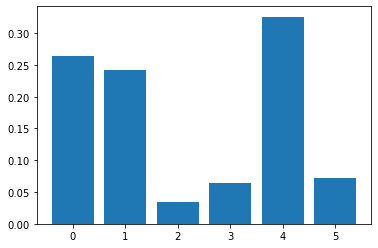

In [32]:
#get and plot feature importance
importance = dtreg1.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
#Time Labels, Day of Week, Mean Temp (°C) are the most important to the model 

In [33]:
#try new models with just these important features
#set X and Y
dtX1a = dtdf1[['Time Labels', 'Day of Week', 'Mean Temp (°C)']]
dtX2a = dtdf2[['Time Labels', 'Day of Week', 'Mean Temp (°C)']]
dtX3a = dtdf3[['Time Labels', 'Day of Week', 'Mean Temp (°C)']]
dtX4a = dtdf4[['Time Labels', 'Day of Week', 'Mean Temp (°C)']]
dtX5a = dtdf5[['Time Labels', 'Day of Week', 'Mean Temp (°C)']]

In [34]:
dty1a = dtdf1['Ride Count']
dty2a = dtdf2['Ride Count']
dty3a = dtdf3['Ride Count']
dty4a = dtdf4['Ride Count']
dty5a = dtdf5['Ride Count']

In [39]:
training_features1a, testing_features1a, training_labels1a, testing_labels1a = train_test_split(dtX1a, dty1a, test_size = 0.25, random_state = 42)
training_features2a, testing_features2a, training_labels2a, testing_labels2a = train_test_split(dtX2a, dty2a, test_size = 0.25, random_state = 42)
training_features3a, testing_features3a, training_labels3a, testing_labels3a = train_test_split(dtX3a, dty3a, test_size = 0.25, random_state = 42)
training_features4a, testing_features4a, training_labels4a, testing_labels4a = train_test_split(dtX4a, dty4a, test_size = 0.25, random_state = 42)
training_features5a, testing_features5a, training_labels5a, testing_labels5a = train_test_split(dtX5a, dty5a, test_size = 0.25, random_state = 42)

In [40]:
#train models
dtreg1a = regressor.fit(training_features1a, training_labels1a)
dtreg2a = regressor.fit(training_features2a, training_labels2a)
dtreg3a = regressor.fit(training_features3a, training_labels3a)
dtreg4a = regressor.fit(training_features4a, training_labels4a)
dtreg5a = regressor.fit(training_features5a, training_labels5a)

In [41]:
#use the models to make predictions
y_pred1a = dtreg1a.predict(testing_features1a)
y_pred2a = dtreg2a.predict(testing_features2a)
y_pred3a = dtreg3a.predict(testing_features3a)
y_pred4a = dtreg4a.predict(testing_features4a)
y_pred5a = dtreg5a.predict(testing_features5a)

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels1a, y_pred1a))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels1a, y_pred1a))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels1a, y_pred1a)))
print('r2: ', round(metrics.r2_score(testing_labels1a, y_pred1a),4))

Mean Absolute Error: 22.77078027782838
Mean Squared Error: 1180.0212449318728
Root Mean Squared Error: 34.35143730518234
r2:  0.6421


In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels2a, y_pred2a))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels2a, y_pred2a))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels2a, y_pred2a)))
print('r2: ', round(metrics.r2_score(testing_labels2a, y_pred2a),4))

Mean Absolute Error: 46.15741366286193
Mean Squared Error: 4218.295861002924
Root Mean Squared Error: 64.94840922611517
r2:  0.3066


In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels3a, y_pred3a))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels3a, y_pred3a))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels3a, y_pred3a)))
print('r2: ', round(metrics.r2_score(testing_labels3a, y_pred3a),4))

Mean Absolute Error: 29.662586755279975
Mean Squared Error: 1979.945394961349
Root Mean Squared Error: 44.496577339851086
r2:  0.5221


In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels4a, y_pred4a))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels4a, y_pred4a))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels4a, y_pred4a)))
print('r2: ', round(metrics.r2_score(testing_labels4a, y_pred4a),4))

Mean Absolute Error: 19.261702739920374
Mean Squared Error: 781.3279996850539
Root Mean Squared Error: 27.952244984706574
r2:  0.6745


In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels5a, y_pred5a))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels5a, y_pred5a))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels5a, y_pred5a)))
print('r2: ', round(metrics.r2_score(testing_labels5a, y_pred5a),4))

Mean Absolute Error: 1.0917320322581798
Mean Squared Error: 33.437911313317805
Root Mean Squared Error: 5.782552318251674
r2:  0.9779
